In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\bhanu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
pwd

'C:\\Users\\bhanu\\Data Science Daily\\Predicting Recidivism'

In [4]:
compas_data = pd.read_csv('Compas_Test.csv')

In [5]:
compas_data.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,is_recid,priors_count,start,end
count,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5347.000000,5848.000000,5848.000000,5848.000000
mean,5521.229993,34.633892,0.052155,4.413475,0.085499,0.110294,0.491491,3.242647,10.953488,546.061731
std,3174.137138,11.826081,0.375651,2.839237,0.475004,0.469319,0.499974,4.823349,44.130037,398.178987
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2763.000000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.750000
50%,5556.500000,31.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,508.000000
75%,8236.250000,42.000000,0.000000,7.000000,0.000000,0.000000,1.000000,4.000000,2.000000,906.000000
max,11001.000000,96.000000,10.000000,10.000000,13.000000,9.000000,1.000000,38.000000,748.000000,1186.000000


In [6]:
compas_data['gap'] = compas_data['end'] - compas_data['start']
compas_data['total_offense'] = compas_data['juv_misd_count'] + compas_data['juv_other_count'] + compas_data['juv_fel_count']

In [7]:


compas_train = compas_data[(compas_data['is_recid'] == 0) | (compas_data['is_recid'] == 1) == True]
compas_test = compas_data[(compas_data['is_recid'] == 0) | (compas_data['is_recid'] == 1) == False]


In [8]:
compas_train.shape
compas_test.shape

(501, 22)

In [9]:
compas_train.columns

Index(['id', 'name', 'first', 'last', 'sex', 'dob', 'age', 'age_cat', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'is_recid', 'score_text', 'in_custody', 'out_custody', 'priors_count',
       'start', 'end', 'gap', 'total_offense'],
      dtype='object')

In [10]:
compas_train_model = compas_train[['age','age_cat','sex','race','total_offense','gap','score_text','decile_score','is_recid']]
compas_test_model = compas_test[['age','age_cat','sex','race','total_offense','gap','score_text','decile_score','is_recid']]
compas_train_model.shape
compas_test_model.shape

(501, 9)

In [11]:
compas_train_model.dtypes

age                int64
age_cat           object
sex               object
race              object
total_offense      int64
gap                int64
score_text        object
decile_score       int64
is_recid         float64
dtype: object

In [12]:
for cols in ['age_cat','sex','race','score_text','decile_score']:
    compas_train_model[cols] = compas_train_model[cols].astype('category')
    compas_test_model[cols] = compas_test_model[cols].astype('category')

C:\Users\bhanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bhanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
compas_train_model.age_cat = pd.Categorical(compas_train_model.age_cat).codes
compas_train_model.sex = pd.Categorical(compas_train_model.sex).codes
compas_train_model.race = pd.Categorical(compas_train_model.race).codes
compas_train_model.score_text = pd.Categorical(compas_train_model.score_text).codes
compas_train_model.decile_score = pd.Categorical(compas_train_model.decile_score).codes
compas_train_model.dtypes

C:\Users\bhanu\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


age                int64
age_cat             int8
sex                 int8
race                int8
total_offense      int64
gap                int64
score_text          int8
decile_score        int8
is_recid         float64
dtype: object

In [14]:
X = compas_train_model.drop("is_recid",axis=1)
y = compas_train_model[['is_recid']]

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

C:\Users\bhanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True,
            random_state=123456, verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.861
Mean accuracy score: 0.87


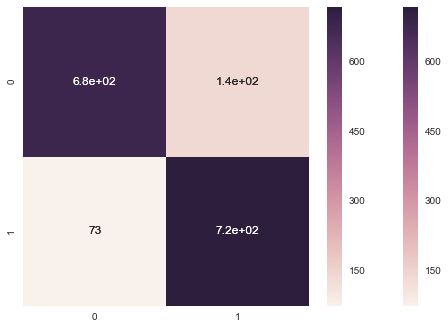

In [19]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

        0.0       0.90      0.83      0.87       815
        1.0       0.84      0.91      0.87       790

avg / total       0.87      0.87      0.87      1605



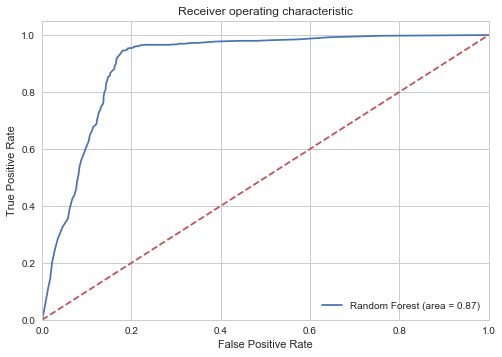

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()